# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Загрузим данные из файла в датафрейм и проверим, корректно ли они загрузились. В качестве разделителя необходимо использовать знак табуляции.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Датафрейм отображается корректно, поэтому далее изучим данные в нем более детально с помощью метода info().

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

О данных в нашем датафрейме мы можем сказать следующее: есть значительные пропуски данных в некоторых столбцах, к значениям некоторых столбцов некорректно применен тип данных, также есть одно некорретное для pep-8 название столбца "cityCenters_nearest", которое необходимо исправить в соответствии со змеинным регистром.

№3 Далее построим общую гистограмму для всех числовых столбцов таблицы.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

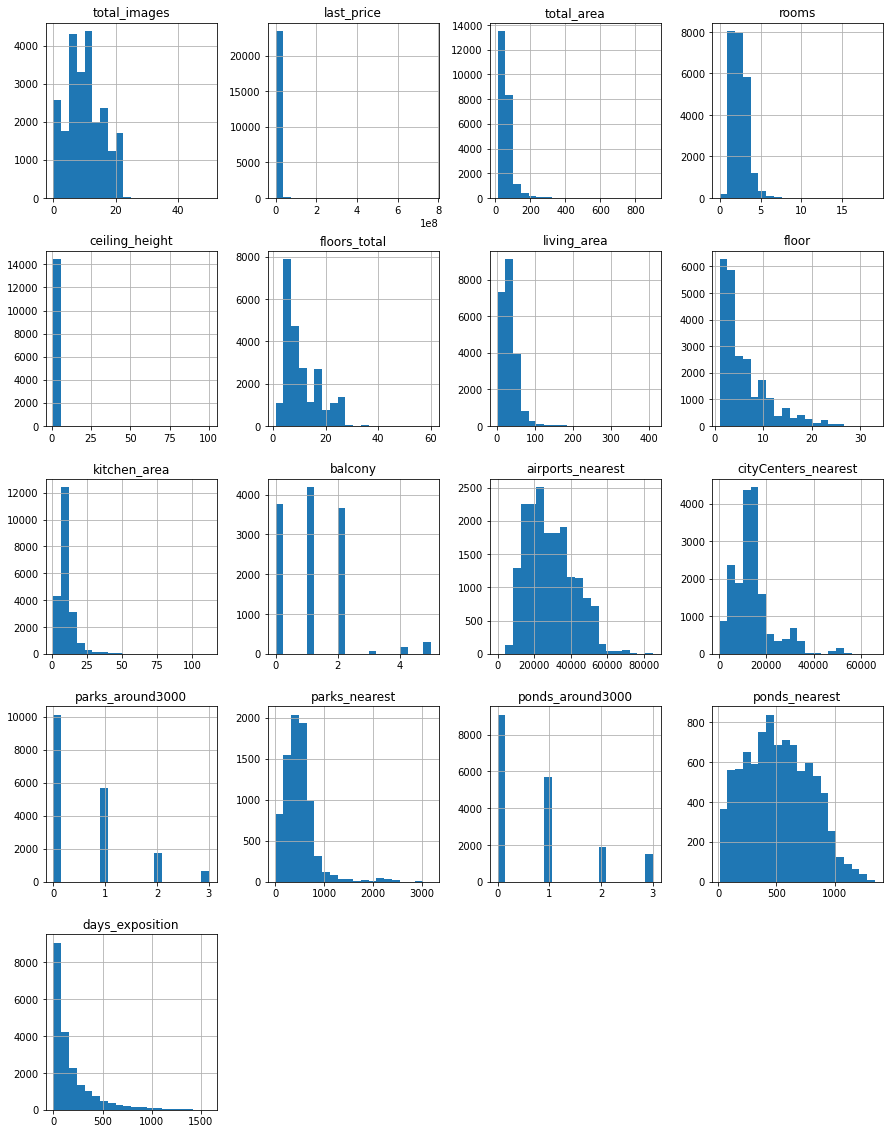

In [3]:
df.hist(figsize=(15, 20), bins=20)

По получившимся гистограммам мы можем сделать следующие выводы: в данных есть пропуски, что подтвердилось и после изучения датафрейма с помощью info(), а также в некоторых параметрах объектов, судя по сосредоточению графика в одной стороне и большом пространстве до/после него, в данных присутствуют аномальные значения (например, в параметре "ceiling_height" мы можем заметить, что судя по правому крайнему значению по оси абцисс 100 - присутсвует аномально большое значение для высоты потолка, что скорее всего является ошибкой, необходимо смотреть детальнее).

### Предобработка данных

Хоть этот пункт и не прописан в задании, но, думаю, будет правильным <b>привести название столбца "cityCenters_nearest" к "змеинному" регистру</b>. Затем проверим, применились ли изменения, с помощью вызова списка названий столбцов датафрейма.

In [4]:
df.rename(columns={'cityCenters_nearest': 'city_сenters_nearest'}, inplace=True)

df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

<b>№1 Найдем и изучим пропущенные значения в столбцах.</b> Первым шагом определим, в каких столбцах присутствуют пропуски:

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Далее необходимо заполнить пропуски там, где это возможно. 

Начнем по порядку. В столбце "celling_height" пропуски составляют около целых 40 % данных, поэтому заменить какими-либо данными пропуски в этом столбце будет неправильным решением, поскольку это действие может сильно исказить данные.

В стольце "floors_total" пропуски составляют ничтожно малую долю относительно общего числа данных, поэтому строки с пропусками в данном столбце мы можем спокойно удалить, это не насет вреда общим выводам:

In [6]:
df.dropna(subset=['floors_total'], inplace=True)

Оставим пропуски в следующем столбце "living_area", так как при их удалении исказятся данные, а заменить их каким-либо значением остается затруднительным.

Столбец "is_apartment" содержит ~88 % пропусков, но эти пропуски с большей долей вероятностью означают лишь то, что квартира НЕ является апартаментами, потому этот параметр пропустили. Поэтому заполним пропуски значением "False":

In [7]:
df['is_apartment'].fillna(False, inplace=True)

Пропуски в столбцн "kitchen_area" мы не изменяем по той же причине, по которой не изменяли пропуски в столбце "living_area".

В столбце "balcony" имеется почти половина пропусков, но они, скорее всего, могут говорить о том, что балкона просто нет, поэтому этот параметр многие и не заполняли. Поэтому можем заменить пропуски на значение 0, т.е. балконов нет:

In [8]:
df['balcony'].fillna(0, inplace=True)

Пропусков в столбце "locality_name" хоть и очень мало, но их удаление может значительно повлиять на последующие выводы. Заменить их невозможно, поскольку мы не владеем соответсвующий инф-й.

Далее пропуски в столбцах "airports_nearest", "city_сenters_nearest", "parks_nearest", "ponds_nearest" мы оставляем, поскольку у нас не хватает информации для замены пропусков на какие-то значения, а удаление приведет к значительному искажению дальнейшего анализа.

Пропуски в столбцах "parks_around3000" и "ponds_around3000" мы также не можем заменить, поскольку в них всего несколько вариантов значений, поэтому вставка каких-либо значений на месте пропусков может привести к значительному искажению. Удалить пропуски не можем, т.к. их число очень велико.

Посмотрим на получившуюся картину:

In [9]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
city_сenters_nearest     5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

<b>Вывод по пропускам:</b> пропуски в столбцах, как показало их изучение, появились  по двум причинам. 1) Намеренный пропуск продавцами значений, т.к. параметр отсутсвует в их квартире (например, количество балконов). 2) Неисправность в программе-картах, ведь число пропусков в соотсветсвующих столбцах одинаково, что может говорить об ошибках непосредственно по технической части. 

In [10]:
#Заполняем пропуски для стобца living_area
v1 = df['total_area'].median() / df['living_area'].median()
df['living_area'] = df['living_area'].fillna(df['total_area'] / v1)

df['living_area'].isna().sum() #проверим количество пропусков

0

In [11]:
#Заполняем пропуски для стобца living_area
v2 = df['total_area'].median() / df['kitchen_area'].median()
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] / v2)

df['kitchen_area'].isna().sum() #проверим количество пропусков

0

<b>Рассмотрим типы данных в каждом столбце</b>. Для удобвства выведем типы данных каждого столбца и начало самого датафрейма:

In [12]:
print(df.dtypes)
df.head(10)

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_сenters_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,25.000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,False,...,11.000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,False,...,8.300,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,91.730769,9,False,...,27.825,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,41.000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.400000,5,False,...,9.100,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.600000,6,False,...,14.400,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,41.307692,22,False,...,18.900,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.430000,26,False,...,8.810,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.600000,7,False,...,6.500,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Заменим тип данных столбца "first_day_exposition" на datetime в целях удобства при дальнейших вычислениях и непосредственно анализа:

In [13]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Далее следует заменить тип данных на int64 в столбцах, где возможно только целое значение: "floors_total", "balcony", "parks_around3000" и "ponds_around3000".

In [14]:
#к первым двум применяеи замену на int
df['floors_total'] = df['floors_total'].astype(int)
df['balcony'] = df['balcony'].astype(int)

#ко второй паре применяеи замену на Int64, поскольку, как оказалось, int не поддерживает пропуски, кои есть в указанных столбцах
#приведение к int вызвало ошибку ValueError: Cannot convert non-finite values (NA or inf) to integer
df['parks_around3000'] = df['parks_around3000'].astype('Int64')
df['ponds_around3000'] = df['ponds_around3000'].astype('Int64')

<b>Изучим уникальные значения в столбце с названиями и устраните неявные дубликаты.</b> Для начала необходимо посмотреть, какие уникальные значения присутствуют в столбце "locality_name":

In [15]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

На первый взгляд можно сказать, что в наименованиях поселений используются разные нназвания однного и то го же, например "посёлок городского типа" и "городской посёлок". Также из этих же значений мы видим, что используется и буква "е", и буква "ё" в слове "поселок", поэтому надо привести к общему виду:

In [16]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

Чтобы исключить разные обозначения одного и того же населенного пункта, необходимо вычленить их и привести к общему виду. Как подсказал преподаватель из projects - сделать это можно с помощью replace и регулярных выражений, вроде получилось:

In [17]:
df['locality_name'].str.replace(r'([А-Я].*)', r'', regex=True).unique()

array(['', 'поселок ', 'городской поселок ', 'деревня ',
       'поселок городского типа ', 'садовое товарищество ', 'село ', nan,
       'поселок городского типа имени ', 'поселок станции ',
       'садоводческое некоммерческое товарищество ',
       'поселок при железнодорожной станции ', 'коттеджный поселок '],
      dtype=object)

Теперь явные дубликаты очевидны и мы можем привести их к одному виду:

In [18]:
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок городского типа')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')
df['locality_name'] = df['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок станции')

Далее будет целесообразным проверить наименования на опечатки, где содержится только названия населенных пунктов:

In [19]:
df['locality_name'].str.replace(r'.*(?=[А-Я])', r'', regex=True).unique()

array(['Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Бор', 'Гатчина', 'Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'Девяткино', 'Металлострой', 'Лебяжье',
       'Сиверский', 'Молодцово', 'Кузьмоловский', 'Ропша', 'Павловск',
       'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'Сестрорецк', 'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое',
       'Заклинье', 'Торковичи', 'Первомайское', 'Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Свет', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск', 'Оржицы',
       'Кальтино', 'Романовка', 'Бугры', 'Рощино', 'Кириши', 'Луга',
       'Волосово', 'Отрадное', 'Павлово', 'Оредеж', 'Копорье',
       'Молодежное', 'Тихвин', 'Победа', 'Нурма', 'Синявино', 'Тосно',
       'Стрельна', 'Бокситогорск', 'Александровская', 'Лопухинка',
       'Пикалево', 'Терволово'

Сложно сказать, есть тут дубликаты или нет, поэтому пока оставим как есть.

<b>Вывод по дубликатам:</b> устранили дубликаты, где использовались буквы "е" и "ё", а также устранили дубли в названиях населенных пунктов.

<b>Найдите и устраните редкие и выбивающиеся значения.</b> Для того, чтобы выполнить данную задачу, нужно для начала изучить распределение в каждом столбце датафрейма:

In [20]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.000000,2.361300e+04,23613.000000,23613.000000,14495.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,18081.000000,18104.000000,18105.000000,8045.000000,18105.000000,9061.000000,20441.000000
mean,9.874518,6.540555e+06,60.340678,2.071147,2.771495,10.673824,34.631561,5.877313,10.502668,0.593063,28788.008185,14185.084015,0.611433,490.554630,0.770119,518.209469,180.884839
std,5.681541,1.090172e+07,35.648988,1.078380,1.261445,6.597173,22.394364,4.873539,6.040009,0.960307,12626.209956,8614.132292,0.802168,341.336698,0.939075,277.887489,219.685543
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.000000,9233.750000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13093.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.800000,16.000000,42.173077,8.000000,12.000000,1.000000,37242.000000,16287.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Площадь 900 кв м и число комнат 19 выглядит подозрительно большим. Чтобы проверить, аномальные это значения или нет - сделаем выборку по двум условиям и изучим ее:

In [21]:
df.query('total_area > 300 and rooms > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
866,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.0,4,False,...,16.6,0,Санкт-Петербург,38076.0,7950.0,0,NaN,2,435.0,418.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5,264.5,2,False,...,27.6,0,Санкт-Петербург,19497.0,3574.0,0,NaN,2,548.0,114.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0


Судя по стоимости квартир данной выборки - всё вполне обосновано, поэтому оставляем значения.

В значениях столбца с количеством комнат присуствует минимальное значение 0, но думаю это нормально, поскольку у квартиры может быть свободная планировка, поэтому эти значения также оставляем.

Однако со знакчениямми в колонке высоты потолков явно что-то неладно, что с минимальным значением - что с максимальным. На просторах интернета я нашла информацию, что нормы в высоте потолков - от 2,5 до 4м. Будем предерживаться этой нормы. Также учтем тот факт, что продавец мог забыть поставить точку в значениях столбца высоты потоолков от 25 до 40 метров. Остальыне значения удалим.

In [22]:
df = df.query('ceiling_height <= 40') #оставляем потолки меньше 40м
df = df.query('ceiling_height <= 4 or ceiling_height >= 25') #отсеиваем аномальные значения в промежутке

df['ceiling_height'].where(df['ceiling_height'] <= 4, df['ceiling_height'] / 10, inplace=True) #делим на 10 значения, чтобы получить правдоподобную высоту

In [23]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['ceiling_height'].isna().sum()


0

### Посчитайте и добавьте в таблицу новые столбцы

<b>Цена одного квадратного метра</b>

In [24]:
df['cost_meter'] = df['last_price'] / df['total_area']

<b>День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)</b>

In [25]:
df['day_publication'] = pd.DatetimeIndex(df['first_day_exposition']).dayofweek

<b>Месяц публикации объявления</b>

In [26]:
df['month_publication'] = pd.DatetimeIndex(df['first_day_exposition']).month

<b>Год публикации объявления</b>

In [27]:
df['year_publication'] = pd.DatetimeIndex(df['first_day_exposition']).year

<b>Тип этажа квартиры (значения — «‎первый», «последний», «другой»)</b>

In [28]:
df['type_floor'] = np.where(df['floor'] == 1, 'первый', np.where(df['floor'] == df['floors_total'], 'последний', 'другой'))

<b>Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)</b>

In [29]:
df['distance_to_center'] = ((df['city_сenters_nearest'] / 1000).round().astype('Int64'))

Проверим получившиеся столбцы:

In [30]:
df[['cost_meter', 'day_publication', 'month_publication', 'year_publication', 'type_floor', 'distance_to_center']]

,cost_meter,day_publication,month_publication,year_publication,type_floor,distance_to_center
0,120370.370370,3,3,2019,другой,16
4,100000.000000,1,6,2018,другой,8
9,88524.590164,6,2,2017,другой,15
10,127525.252525,3,11,2017,другой,14
13,82943.925234,5,7,2017,последний,33
...,...,...,...,...,...,...
23691,129903.978052,3,10,2016,другой,4
23693,73717.948718,4,8,2016,другой,34
23694,72490.845228,1,3,2017,другой,4
23697,149511.400651,1,3,2017,другой,10


### Проведите исследовательский анализ данных

<b>#1 Изучите параметры объектов, постройте отдельные гистограммы для каждого из этих параметров и опишите все ваши наблюдения по параметрам</b>

<b>Общая площадь</b>

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

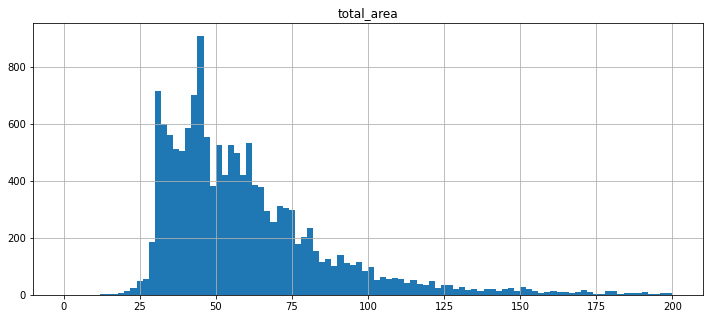

In [31]:
df.hist(column='total_area', range=(0,200), bins=100, figsize=(12,5))

Большинство площадей квартир расположены в диапазоне ~ от 30 до 100 кв.м. Больше всего квартир с площадью около 45кв.м. С увеличением площади квартир - количство объявлений с ними снижается, но есть некоторые высокие значения в районе 60кв.м. — 70кв.м.

<b>Жилая площадь</b>

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

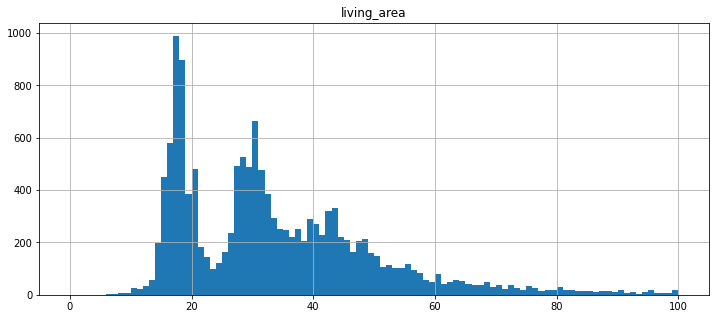

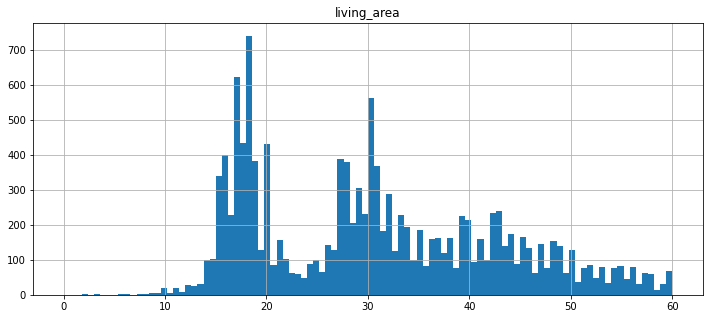

In [32]:
df.hist(column='living_area', range=(0,100), bins=100, figsize=(12,5))
df.hist(column='living_area', range=(0,60), bins=100, figsize=(12,5)) #рассмотрим поближе график, где сосредоточено большинство значений

По первому графику можно сделать вывод, что болиншство квартир в объявлениях имеют жилую площадь ~ от 17 до 21кв м. и ~от 25 до 60кв.м.

<b>Площадь кухни</b>

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

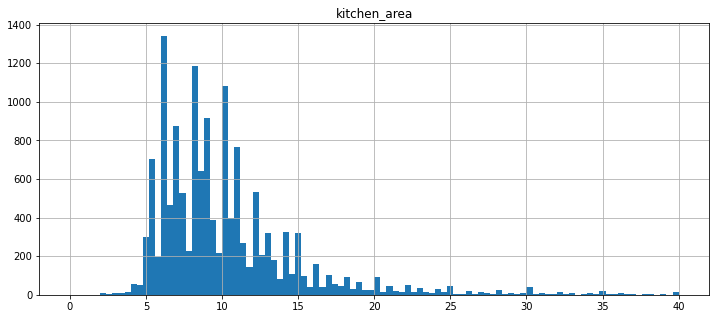

In [33]:
df.hist(column='kitchen_area', range=(0,40), bins=100, figsize=(12,5))

Большинство составляют квартиры с площадью кухни от 5 до 30 кв.м. Из них же основное значение площади кухни составляет ~ от 6 до 13 кв.м. 

<b>Цена объекта</b>

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

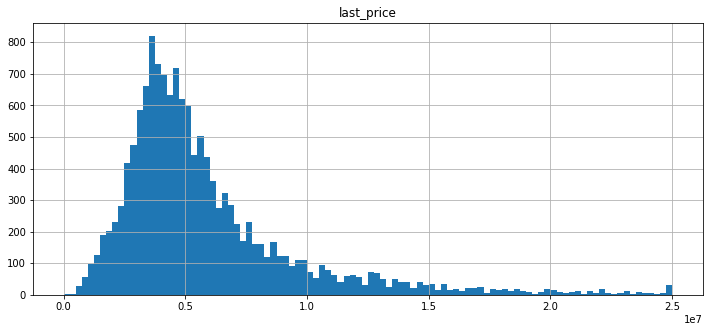

In [34]:
df.hist(column='last_price', range=(0,25000000), bins=100, figsize=(12,5))

Большинство квартир по стоимости лежат в диапазоне от 2 до 8 млн. руб. Больше всего квартир со стоимостью около 4 млн. руб. (на это значение приходится пик гистограммы)

<b>Количество комнат</b>

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

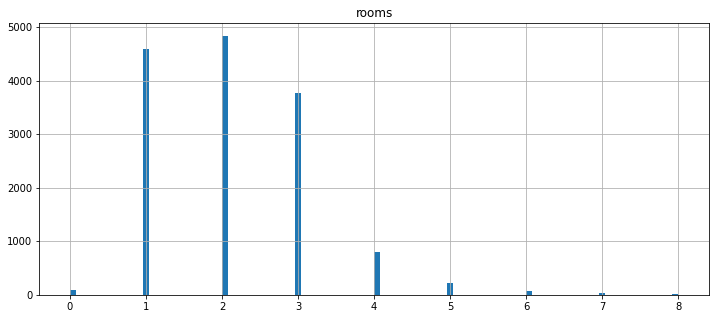

In [35]:
df.hist(column='rooms', range=(0,8), bins=100, figsize=(12,5))

Большинство квартир из объявлений имеет количество комнат от 1 до 3.

<b>Высота потолков</b>

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

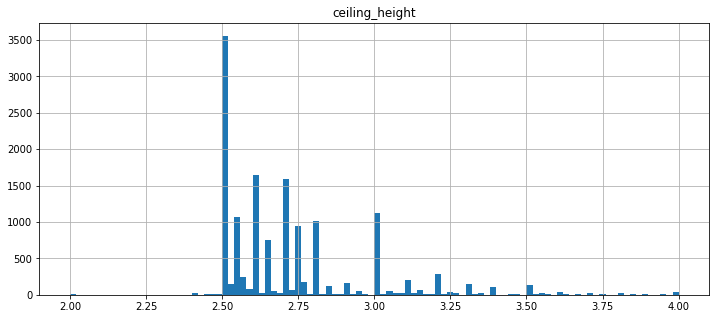

In [36]:
df.hist(column='ceiling_height', range=(2,4), bins=100, figsize=(12,5))

Болишнство квартир имеют высоту потолка в диапазоне от 2,5 до 3 метров. Пик приходится на квартиры с высотой потолков 2,5м.

<b>Этаж квартирыь</b>

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

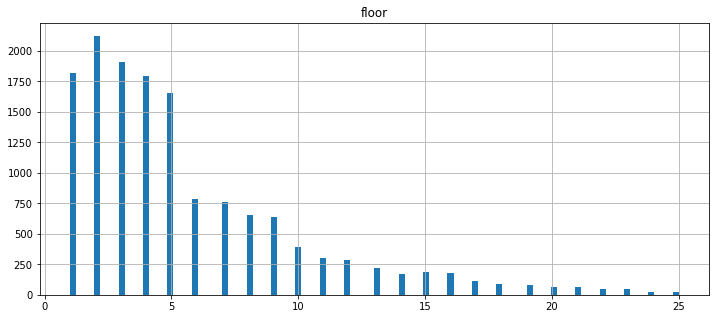

In [37]:
df.hist(column='floor', range=(1,25), bins=100, figsize=(12,5))

Большинство квартир расположены на 1-10 этажах. 

<b>Тип этажа квартиры</b>

In [38]:

#df.hist(column='type_floor', figsize=(12,5))

<AxesSubplot:xlabel='type_floor'>

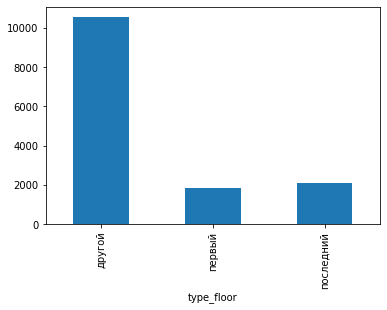

In [39]:
df.groupby(by='type_floor')['type_floor'].count().plot(kind='bar')

In [40]:
df.groupby('type_floor')['type_floor'].count()

type_floor
другой       10557
первый        1816
последний     2066
Name: type_floor, dtype: int64

У меня не получилсоь построить аналогично гистаграмму (при аналогичном коде выдавало ошибку "". буду рада, если подскажете, в чем дело), к тому же значений всего 3, поэтому можно сделать вывод по этой таблице: болишснтво квартир находится не на первом и не на последнем этаж, а между ними

<b>Общее количество этажей в доме</b>

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

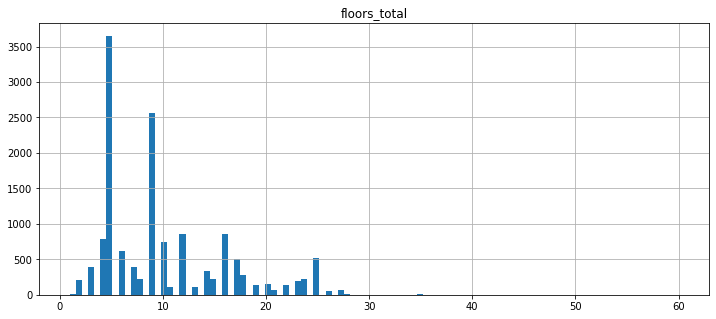

In [41]:
df.hist(column='floors_total', bins=100, figsize=(12,5))

Большая часть квартир расположена в домах до на 25 этажей.

<b>Расстояние до центра города в метрах</b>

array([[<AxesSubplot:title={'center':'city_сenters_nearest'}>]],
      dtype=object)

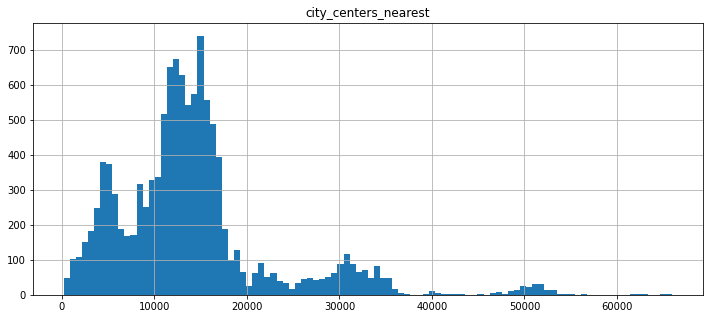

In [42]:
df.hist(column='city_сenters_nearest', bins=100, figsize=(12,5))

Болишнство квартир расположены не дальше чем 20км от центра. Наблюдаются также всплекски в районе 30км от центра и 50км, что может означать, что там находятся относительно крупные населенные пункты.

<b>Расстояние до ближайшего аэропорта</b>

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

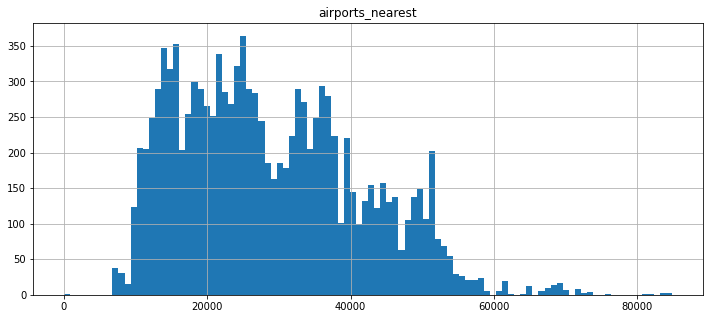

In [43]:
df.hist(column='airports_nearest', bins=100, figsize=(12,5))

Основная часть квартир удалены от аэропорта на расстояние от 8 до 60км.

<b>Расстояние до ближайшего парка</b>

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

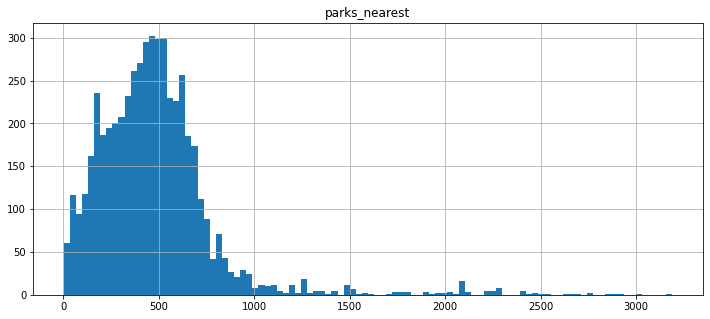

In [44]:
df.hist(column='parks_nearest', bins=100, figsize=(12,5))

Болишнство квартир удалены от ближайшего парка на расстояние до 1000м.

<b>День и месяц публикации объявления</b>

array([[<AxesSubplot:title={'center':'month_publication'}>]], dtype=object)

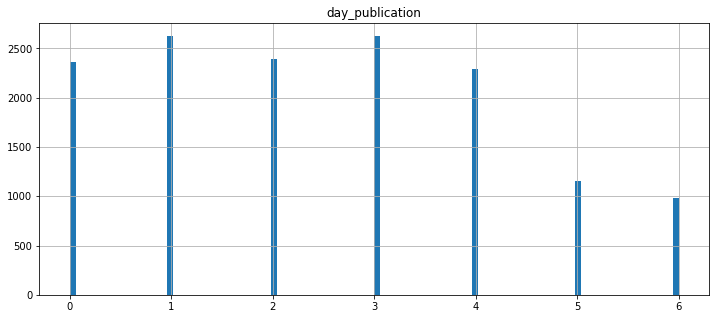

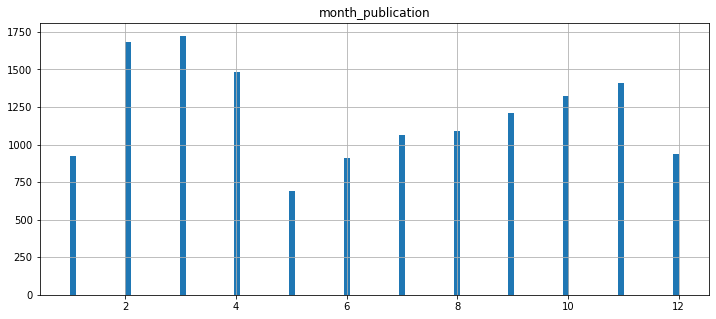

In [45]:
df.hist(column='day_publication', bins=100, figsize=(12,5))
df.hist(column='month_publication', bins=100, figsize=(12,5))

Большинство объялвений были опубликованы в будние дни. Самыми большими по количеству объявлений являются февраль, март, апрель; самыми маленькими по количеству - январь, май и декабрь.

<b>№2 Изучите, как быстро продавались квартиры.</b>

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

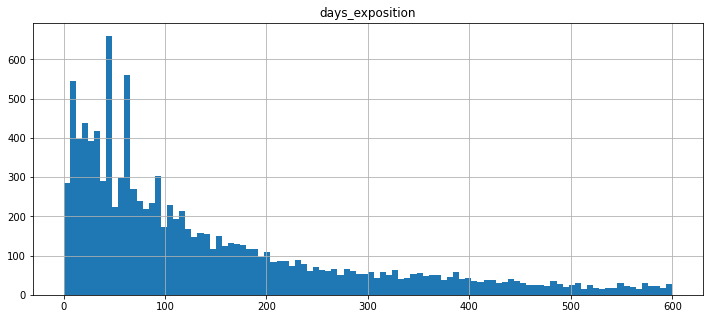

In [46]:
df.hist(column='days_exposition', range=(0, 600), bins=100, figsize=(12,5))

In [47]:
print('Среднее:', df['days_exposition'].mean())
print('Медиана:', df['days_exposition'].median())

Среднее: 189.9059843307218
Медиана: 103.0


В среднем продажа квартиры составляет 180 дней, то есть около полугода. Медианное время продажи - 95 дней. Такая разница может говорить о том, что в данных присутсвуют квартиры, которые стояли на продаже очень долгое время, потому среднее время продажи гораздо больше медианы.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

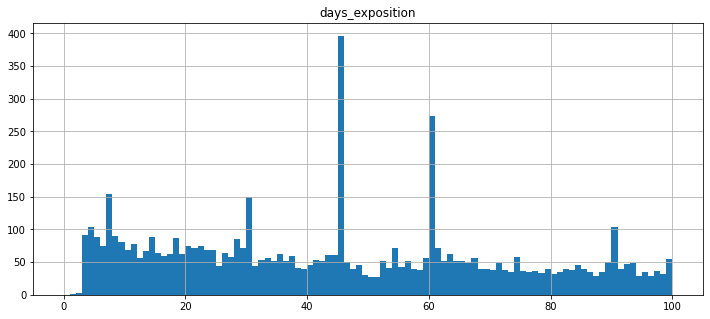

In [48]:
df.hist(column='days_exposition', range=(0, 100), bins=100, figsize=(12,5))

<div class="alert alert-block alert-info">

<b>Обновленный вывод:</b>В среднем продажа квартиры составляет 180 дней, то есть около полугода. Медианное время продажи - 95 дней. Такая разница может говорить о том, что в данных присутсвуют квартиры, которые стояли на продаже очень долгое время, потому среднее время продажи гораздо больше медианы. Также в данных присутсвуют значительный выбросы (вторая гистограмма), которые соотсвутсуют приблизительно соотсветсвуют значениям 45 и 62 дня. Болишьнство квартир продавалась за такое количество дней.
      
</div>

<b>№3 Какие факторы больше всего влияют на общую (полную) стоимость объекта?</b>

<b>Зависит ли цена от общей площади?</b>

0.7050831312827853

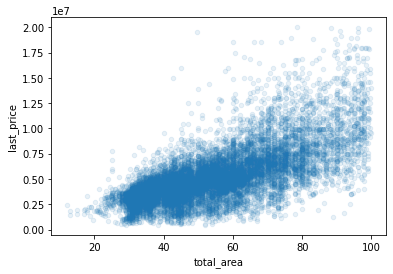

In [49]:
df.query('total_area < 100 and last_price < 20000000').plot(x='total_area', y='last_price', kind='scatter', alpha=0.1) 
df.corr()['last_price']['total_area']

Есть небольшая зависимость цены квартиры от ее площади, что логично. По наличию множества выбивающихся значений можно предположить, что цена зависит не только от рассматриваемого параметра.

<b>Зависит ли цена от жилой площади?</b>

0.6144408451672049

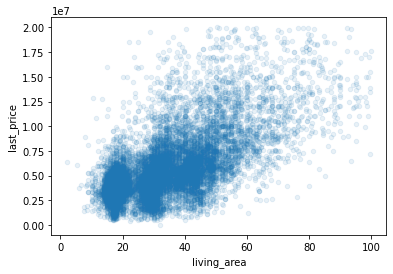

In [50]:
df.query('living_area < 100 and last_price < 20000000').plot(x='living_area', y='last_price', kind='scatter', alpha=0.1) 
df.corr()['last_price']['living_area']

Небольшая зависимость есть; также мы можем заметить, что данные сгрупированные на 3 группы, что может о чем-то говорить.

<b>Зависит ли цена от площади кухни?</b>

0.5530809600254184

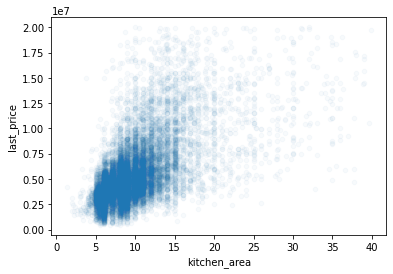

In [51]:
df.query('kitchen_area < 40 and last_price < 20000000').plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.03) 
df.corr()['last_price']['kitchen_area']

Также наблдаем неольшую зависимость. Это может быть связано с тем, что чем дороже квартира - тем больше в ней площадь кухни.

<b>Зависит ли цена от количества комнат?</b>

0.39672356038918605

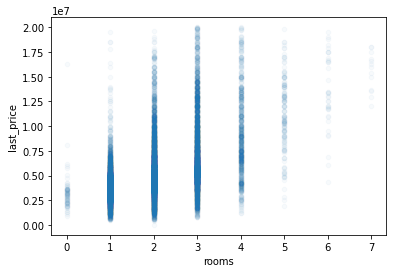

In [52]:
df.query('rooms < 8 and last_price < 20000000').plot(x='rooms', y='last_price', kind='scatter', alpha=0.03) 
df.corr()['last_price']['rooms']

По графику мы можеи сказать, что наблюдается слабо выраженная заивисмость цены от количества комнат: чем больше комнат, тем дороже квартира.

<b>Зависит ли цена от этажа?</b>

0.03950736633054211

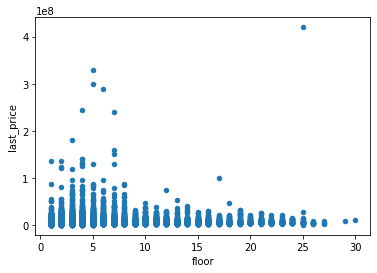

In [53]:
df.plot(x='floor', y='last_price', kind='scatter', alpha=1) 
df.corr()['last_price']['floor']

По графику: зависимость небольшая, но она есть. Квартиры ближе к последнему этажу дешевле, нежели остальные. Тем не менее, можем заметить выбившуюся точку, расположившуюся на высоком этаже и с самой большой стоимостью. Это может говорить о том, что на последнем этаже дома расположена, например, дорогая двухэтажная квартира; так что это не выброс. В целом у квартир, расположенных до 7 этажа, наблюдается разная стоимость, но таких квартир немнного.

По значени корреляции: зависимость практически отсутсвует.

<b>Зависит ли цена от даты размещения?</b>

<AxesSubplot:xlabel='year_publication', ylabel='last_price'>

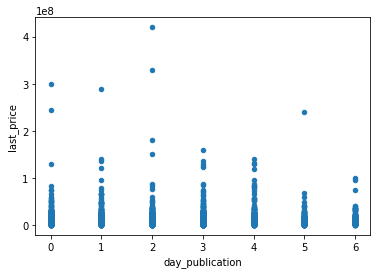

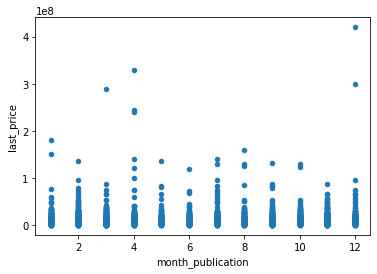

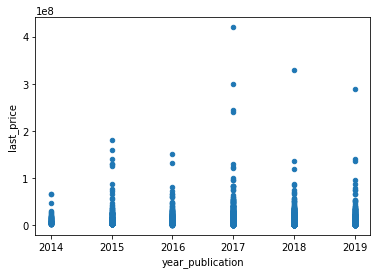

In [54]:
df.plot(x='day_publication', y='last_price', kind='scatter', alpha=1) 
df.plot(x='month_publication', y='last_price', kind='scatter', alpha=1) 
df.plot(x='year_publication', y='last_price', kind='scatter', alpha=1) 

Зависимости цены от дня недели или месяца не наблюдается. Цена от года по сути не зависит, но тем не менее в 2014 году были цены на квартиры значительно ниже. Затем цена по годам особо не отличается.

<b>#4 Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений</b>

In [55]:
price_settlement = df.pivot_table(index='locality_name', values='cost_meter', aggfunc=['mean', 'count'])

price_settlement.columns = ['mean_meter', 'amount']

print(price_settlement.sort_values(by='amount', ascending=False).head(10))



                      mean_meter  amount
locality_name                           
Санкт-Петербург    115347.173928   10047
Всеволожск          67267.996231     271
Пушкин             103817.355642     233
поселок Шушары      79286.491658     216
поселок Мурино      87138.590997     214
Колпино             75938.525561     203
Гатчина             69992.693801     149
Петергоф            85554.144673     145
поселок Парголово   90901.351145     137
Сестрорецк         102267.327328     129


Самая высокая цена однго кв.м. составляет 115 347 руб. и принадлежит непосредственно городу СПб. Минимальная же цена кв. м. из данной выорки принадлежит населенному пункту Всеволожск и составляет 67 268 руб.

<b>#5 Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города</b>

<AxesSubplot:xlabel='distance_to_center'>

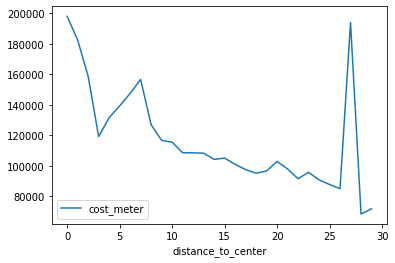

In [56]:
cost_km = df.query('locality_name == "Санкт-Петербург"').pivot_table(index='distance_to_center', values='cost_meter', aggfunc='mean')

cost_km.plot()

Если исключить всплески, то можно сказать, что чем ближе к центру объект - тем дороже он стоит. Однако есть 2 всплеска, которые могут быть связаны с выгодным местоположением объекта относительно каких-то параметров.

### Общий вывод

<b>Шаг 1. Открытие файла с данными и изучение общей информации</b>
<br>
Данные были успешно загружены, никаких проблем не возникло. Дана предварительная оценка данных: в некоторых столбцах присутсвуют пропуски и аномальные значения.
<br><br>

<b>Шаг 2. Предобработка данных</b>
<br>
Был переименован столбец cityCenters_nearest в соотсветсвии со "змеинным регистром". Были найдены и обработаны (где возможно) пропуски в столбцах: одна часть удалена, вторая заполнена, третья - не тронута. Значения в некоторых столбцах были приведены к правильным типам данных, чтобы можно было корретно выполнять дальнейшие задачи. Были устранены неявные дубликаты в данных для дальнейшего корретного анализа. Также были обработаны и устранены аномальные значения в столбцах (в частности, удалены аномально большие значения потолков).
<br><br>

<b>Шаг 3. Добавление в таблицу новых столбцов</b>
<br>
В данные было решено добавить некоторые параметры для дальнейшего анализа:
<li>цена одного квадратного метра - cost_meter</li>
<li>день недели публикации объявления - day_publication</li>
<li>месяц публикации объявления - month_publication</li>
<li>год публикации объявления - year_publication</li>
<li>тип этажа квартиры - type_floor</li>
<li>расстояние до центра города в километраx - distance_to_center</li>
<br><br>

<b>Шаг 4. Исследовательский анализ данных</b>
<br>
Были изучены параметры объектов и сделаны следующие выводы:
<li>Общая площадь квартир в большинствк своем находится в диапазоне от 30 до 100 кв.м.;</li>
<li>Жилая площадь квартир находится в основном в двух диапазлнах: от 17 до 21 кв.м. и от 25 до 60 кв.м.;</li>
<li>Площадь кухни в среднем составляет от 5 до 30 кв.м.;</li>
<li>Цена объектов в основном лежит в диапазоне от 2 до 8 млн. руб.;</li>
<li>количество комнат у большинства объектов - от 1 до 3;</li>
<li>Высота потолков для большинства объектов составляет от 2,5 до 3 метров;</li>
<li>Болишнство квартир расположено на 1-10 этажах;</li>
<li>Большинство квартир находится между первым и последним этажами, преимущественно ближе к первому;</li>
<li>Основная часть квартир расположена в домах с этажностью не выше 25;</li>
<li>Большинство квартир расположены до 20км от центра города;</li>
<li>Основная часть квартир удалены от аэропорта на расстояние от 8 до 60км;</li>
<li>Большинство квартир удалены от ближайшего парка на расстояние до 1км;</li>
<li>Большинство объялвений было опубликовано в будние дни с февраля по март.</li>
<br>
Также в процессе анализа были выялвены следующие факты и закономерности:
<li>В среднем продажа квартиры составляет 180 дней, то есть около полугода. Медианное время продажи - 95 дней.</li>
<li>На общую стоиомсть объекта больше всего влияют такие параметры, как жилая и общая площади, а также год объявления.</li>
<li>Самая высокая стоимость 1 кв.м. среди населенных пунктов с наибольшим числом объявлений в Санкт-Петербурге - 115 347 руб.; самая низкая в Всеволожске - 67 268 руб.</li>
<li>Если исключить всплески, то чем ближе к центру объект - тем дороже он стоит. Однако есть 2 всплеска, которые могут быть связаны с выгодным местоположением объекта относительно каких-то параметров.</li>
<br><br>